In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df= pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
corr = df.corr()

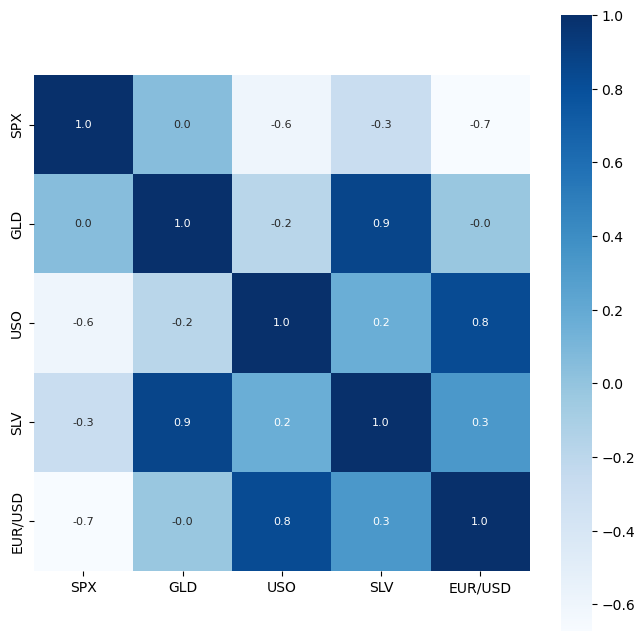

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [10]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Ibrahim K. Gamal\AppData\Local\Temp\ipykernel_11944\415844372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


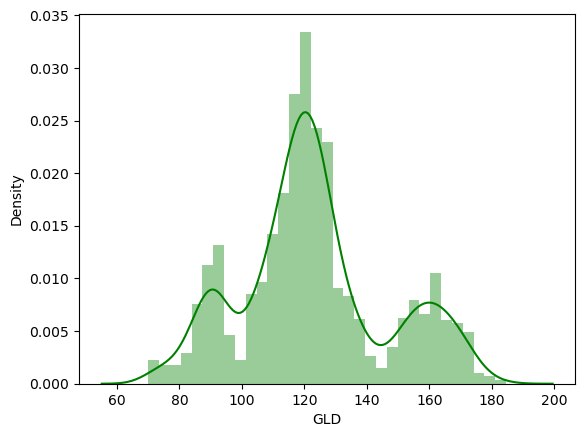

In [11]:
sns.distplot(df['GLD'], color='green')
plt.show()

In [12]:
X=df.drop(['Date','GLD'], axis=1)
y=df['GLD']

In [13]:
print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
model= RandomForestRegressor(n_estimators=100)

In [16]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
test_data_pred= model.predict(X_test)

In [18]:
print(test_data_pred)

[168.46349963  82.15979979 115.9885     127.54530058 120.65060155
 154.76409819 150.44919885 126.15700044 117.34349896 126.0460002
 116.3588012  171.78650023 141.74669805 167.83119783 115.26940007
 117.69060067 139.89330354 170.12050104 159.58730306 160.81599968
 154.94860024 125.37600024 175.62870052 157.47420335 125.10980037
  93.95039983  77.66669979 120.46150019 119.1370994  167.43009917
  88.20160071 125.27970021  91.14990079 117.60260039 121.1510987
 136.03930087 115.36700127 115.26100064 146.78209978 107.23290097
 103.88080224  87.13669808 126.45440042 117.94470009 154.14599976
 119.4827003  108.37040006 108.008598    93.29080071 127.04959765
  74.55110034 113.63149931 121.27350005 111.26369932 118.81079893
 121.24929906 158.99630055 167.83080169 146.70329712  85.96289901
  94.3284004   86.80419896  90.57740016 119.07590078 126.38030029
 127.50209965 169.64210017 122.31629922 117.37799879  98.60680029
 168.08380157 142.94009818 131.84790227 121.22210242 120.83919955
 119.7836007

In [19]:
erroe_score = metrics.r2_score(y_test, test_data_pred)
print('R Squared Error Is : ', erroe_score)

R Squared Error Is :  0.9895922097617887


In [20]:
y_test = list(y_test)

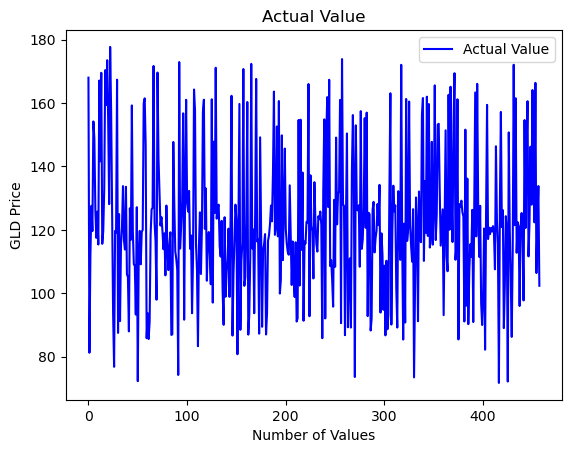

In [21]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.title('Actual Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

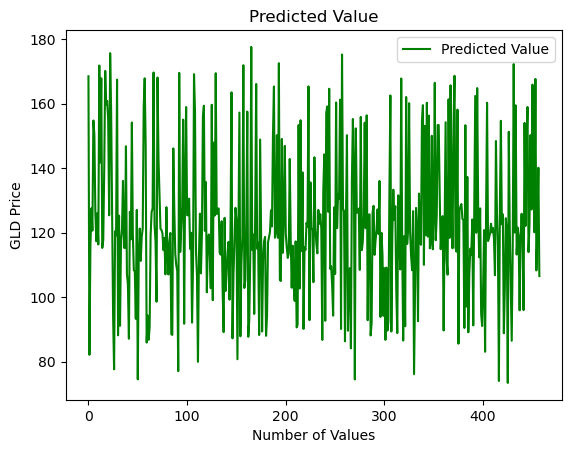

In [22]:
plt.plot(test_data_pred, color='green', label= 'Predicted Value')
plt.title('Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

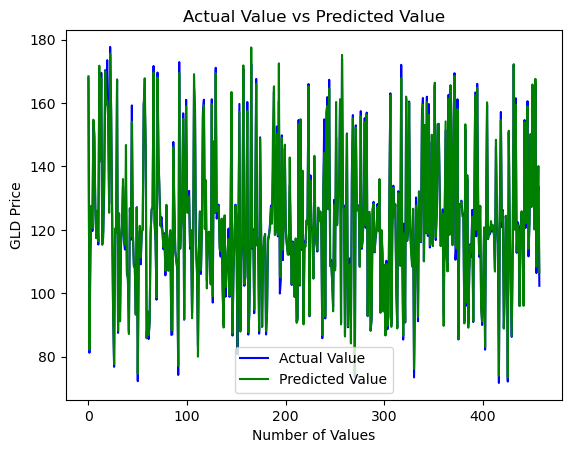

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label= 'Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()